# Building MLR Model for BoomBikes dataset

### Business Goal : Model the demand for shared bikes with the available independent variables

In [1]:
### Meta Data
### Features 'weathersit' and 'season' have values as 1, 2, 3, 4
""" weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
    season : 
        - 1:spring
        - 2:summer
        - 3:fall
        - 4:winter
    
    These are unordered categorical variables. Create dummies for these variables.
"""
### yr : year (0: 2018, 1:2019)
### mnth : month ( 1 to 12)
### holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
### weekday : day of the week
### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
### temp : temperature in Celsius
### atemp: feeling temperature in Celsius
### hum: humidity
### windspeed: wind speed
### casual: count of casual users
### registered: count of registered users
### cnt: count of total rental bikes including both casual and registered

' weathersit : \n\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n        \n    season : \n        - 1:spring\n        - 2:summer\n        - 3:fall\n        - 4:winter\n    \n    These are unordered categorical variables. Create dummies for these variables.\n'

In [2]:
## Lets create the dataframe from the dataset.
import numpy as np 
import pandas as pd 


In [3]:
bikesusage = pd.read_csv("day.csv")

In [4]:
bikesusage.columns[bikesusage.isna().any()].tolist()

[]

In [5]:
bikesusage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikesusage.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bikesusage.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [8]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Can see that no empty entries are there in the dataset. All the data is non-empty. This is a good sign to start with.

In [9]:
len(bikesusage.dteday.unique())

730

In [10]:
len(bikesusage.season.unique())

4

In [11]:
bikesusage.season.unique()

array([1, 2, 3, 4])

In [12]:
bikesusage.yr.unique()

array([0, 1])

In [13]:
bikesusage.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
bikesusage.holiday.unique()

array([0, 1])

### holiday : 1 means it is a holiday, 0 means it is not a holiday

In [15]:
bikesusage.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [16]:
bikesusage.workingday.unique()

array([0, 1])

### workingday : 1 means it is a working day, 0 means it is not.

In [17]:
bikesusage.weathersit.unique()

array([2, 1, 3])

In [18]:
### There is no data for weathersit 4 as mentioned in the data dictionary
### That means there is no data for very bad weather conditions.

In [19]:
len(bikesusage.temp.unique())

498

In [20]:
len(bikesusage.atemp.unique())

689

In [21]:
len(bikesusage.hum.unique())

594

In [22]:
len(bikesusage.windspeed.unique())

649

In [23]:
len(bikesusage.casual.unique())

605

In [24]:
len(bikesusage.registered.unique())

678

In [25]:
bikesusage.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [26]:
### instant field is just the serial number, which is not useful to us. Lets drop that
del bikesusage['instant']

In [27]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [28]:
bikesusage[['casual', 'registered', 'cnt']]

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600
...,...,...,...
725,247,1867,2114
726,644,2451,3095
727,159,1182,1341
728,364,1432,1796


In [29]:
## cnt = casual + registered
## Our goal is to predict demand for shared bikes which is represented by cnt field. 
## With that said, casual and registered are not useful in this exercise. Lets drop those.
bikesusage.drop(['casual', 'registered'], axis=1, inplace=True)

In [30]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [31]:
## Categorical variables are season, yr, mnth, holiday, weekday, workingday, weathersit

In [32]:
bikesusage[['season', "cnt"]].groupby(by='season').sum()

,cnt
season,
1,469514
2,918589
3,1061129
4,841613


In [33]:
bikesusage[['yr', "cnt"]].groupby(by='yr').sum()

,cnt
yr,
0,1243103
1,2047742


In [34]:
bikesusage[['mnth', "cnt"]].groupby(by='mnth').sum()

,cnt
mnth,
1,134933
2,149518
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


In [35]:
bikesusage[['holiday', "cnt"]].groupby(by='holiday').sum()

,cnt
holiday,
0,3212410
1,78435


In [36]:
bikesusage[['weekday', "cnt"]].groupby(by='weekday').count()

,cnt
weekday,
0,105
1,105
2,104
3,103
4,104
5,104
6,105


In [37]:
bikesusage[['weekday', "cnt"]].groupby(by='weekday').sum()

,cnt
weekday,
0,444027
1,455503
2,469109
3,471214
4,485395
5,487790
6,477807


In [38]:
bikesusage[['workingday', "cnt"]].groupby(by='workingday').sum()

,cnt
workingday,
0,1000269
1,2290576


In [39]:
bikesusage[['weathersit', "cnt"]].groupby(by='weathersit').sum()

,cnt
weathersit,
1,2257952
2,995024
3,37869


### From the above analysis, the weekday field does not seem to be having any impact on the demand distribution. We will check the plots down below.

In [40]:
bikesusage[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [41]:
## week, year, month columns are available separately. So dteday also is not needed
bikesusage.drop(['dteday'], axis=1, inplace=True)

In [42]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [43]:
import matplotlib.pyplot as plt
import seaborn as sb

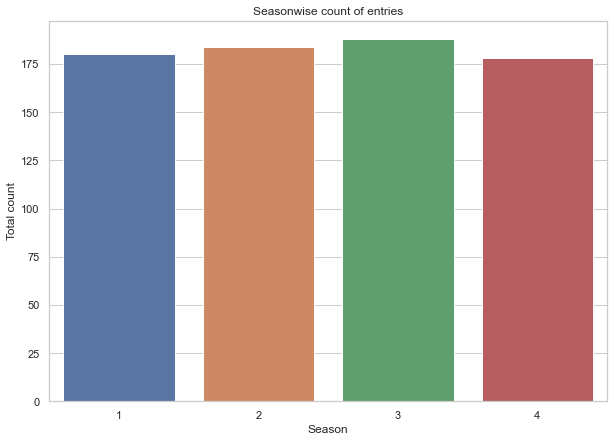

In [44]:
#Countplot to show the season wise distribution of number of days the bikes were used
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='season',data=bikesusage)
years = sorted(bikesusage['season'].unique())
xpos=np.arange(len(years))
ax.set(xlabel='Season', ylabel='Total count',title='Seasonwise count of entries')
plt.xticks(xpos,years)
plt.show()

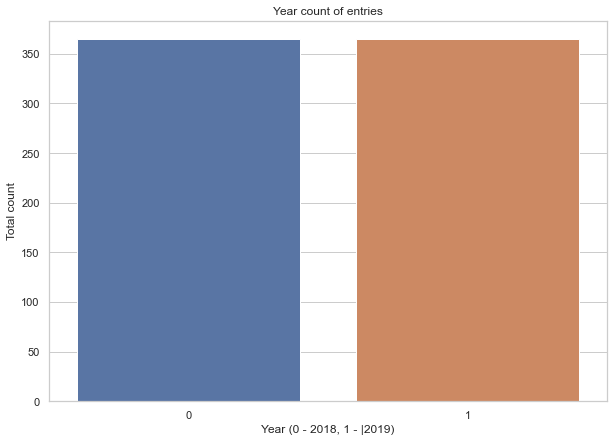

In [45]:
#Countplot to show the season wise distribution of number of days the bikes were used
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='yr',data=bikesusage)
years = sorted(bikesusage['yr'].unique())
xpos=np.arange(len(years))
ax.set(xlabel='Year (0 - 2018, 1 - |2019)', ylabel='Total count',title='Year count of entries')
plt.xticks(xpos,years)
plt.show()

#### Looks like throughout the year there were usages. Looking at count does not make sense. Lets go for univariate analysis.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


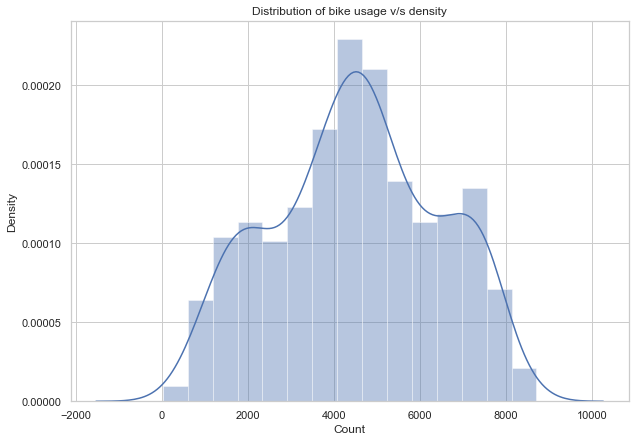

In [46]:
## Lets look at cnt now for the year
plt.figure(figsize=(10,7))
ax=sb.distplot(bikesusage['cnt'],bins=15,color='b')
ax.set(xlabel='Count',title='Distribution of bike usage v/s density')
plt.show()

In [47]:
## Most frequency is ~ 4000-4500

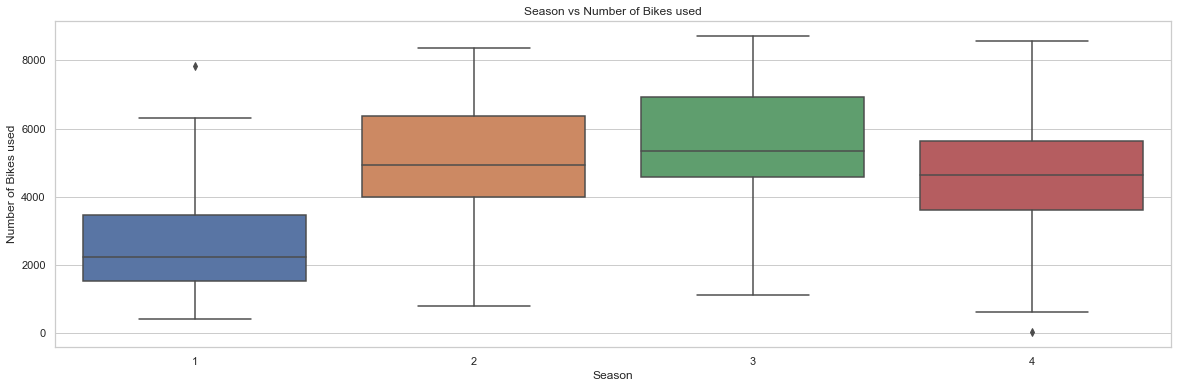

In [48]:
plt.figure(figsize=(20,6))
ax=sb.boxplot(x='season',y='cnt',data=bikesusage)
ax.set(xlabel='Season', ylabel='Number of Bikes used',title='Season vs Number of Bikes used')
plt.show()

### Fall and Summer has higher usages. During Falls people are more active.

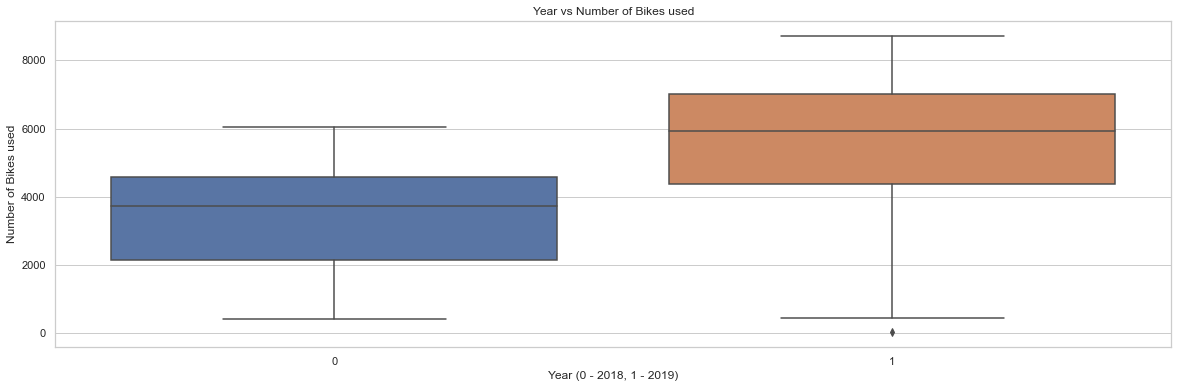

In [49]:
plt.figure(figsize=(20,6))
ax=sb.boxplot(x='yr',y='cnt',data=bikesusage)
ax.set(xlabel='Year (0 - 2018, 1 - 2019)', ylabel='Number of Bikes used',title='Year vs Number of Bikes used')
plt.show()

### Year 2019 has higher usage. That means popularity is increasing year by year.

In [50]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


[Text(0.5, 0, 'Weather (1 - Clear, 2 - Mist, 3 - Light Snow))'),
 Text(0, 0.5, 'Number of Bikes used'),
 Text(0.5, 1.0, 'Weather vs Number of Bikes used')]

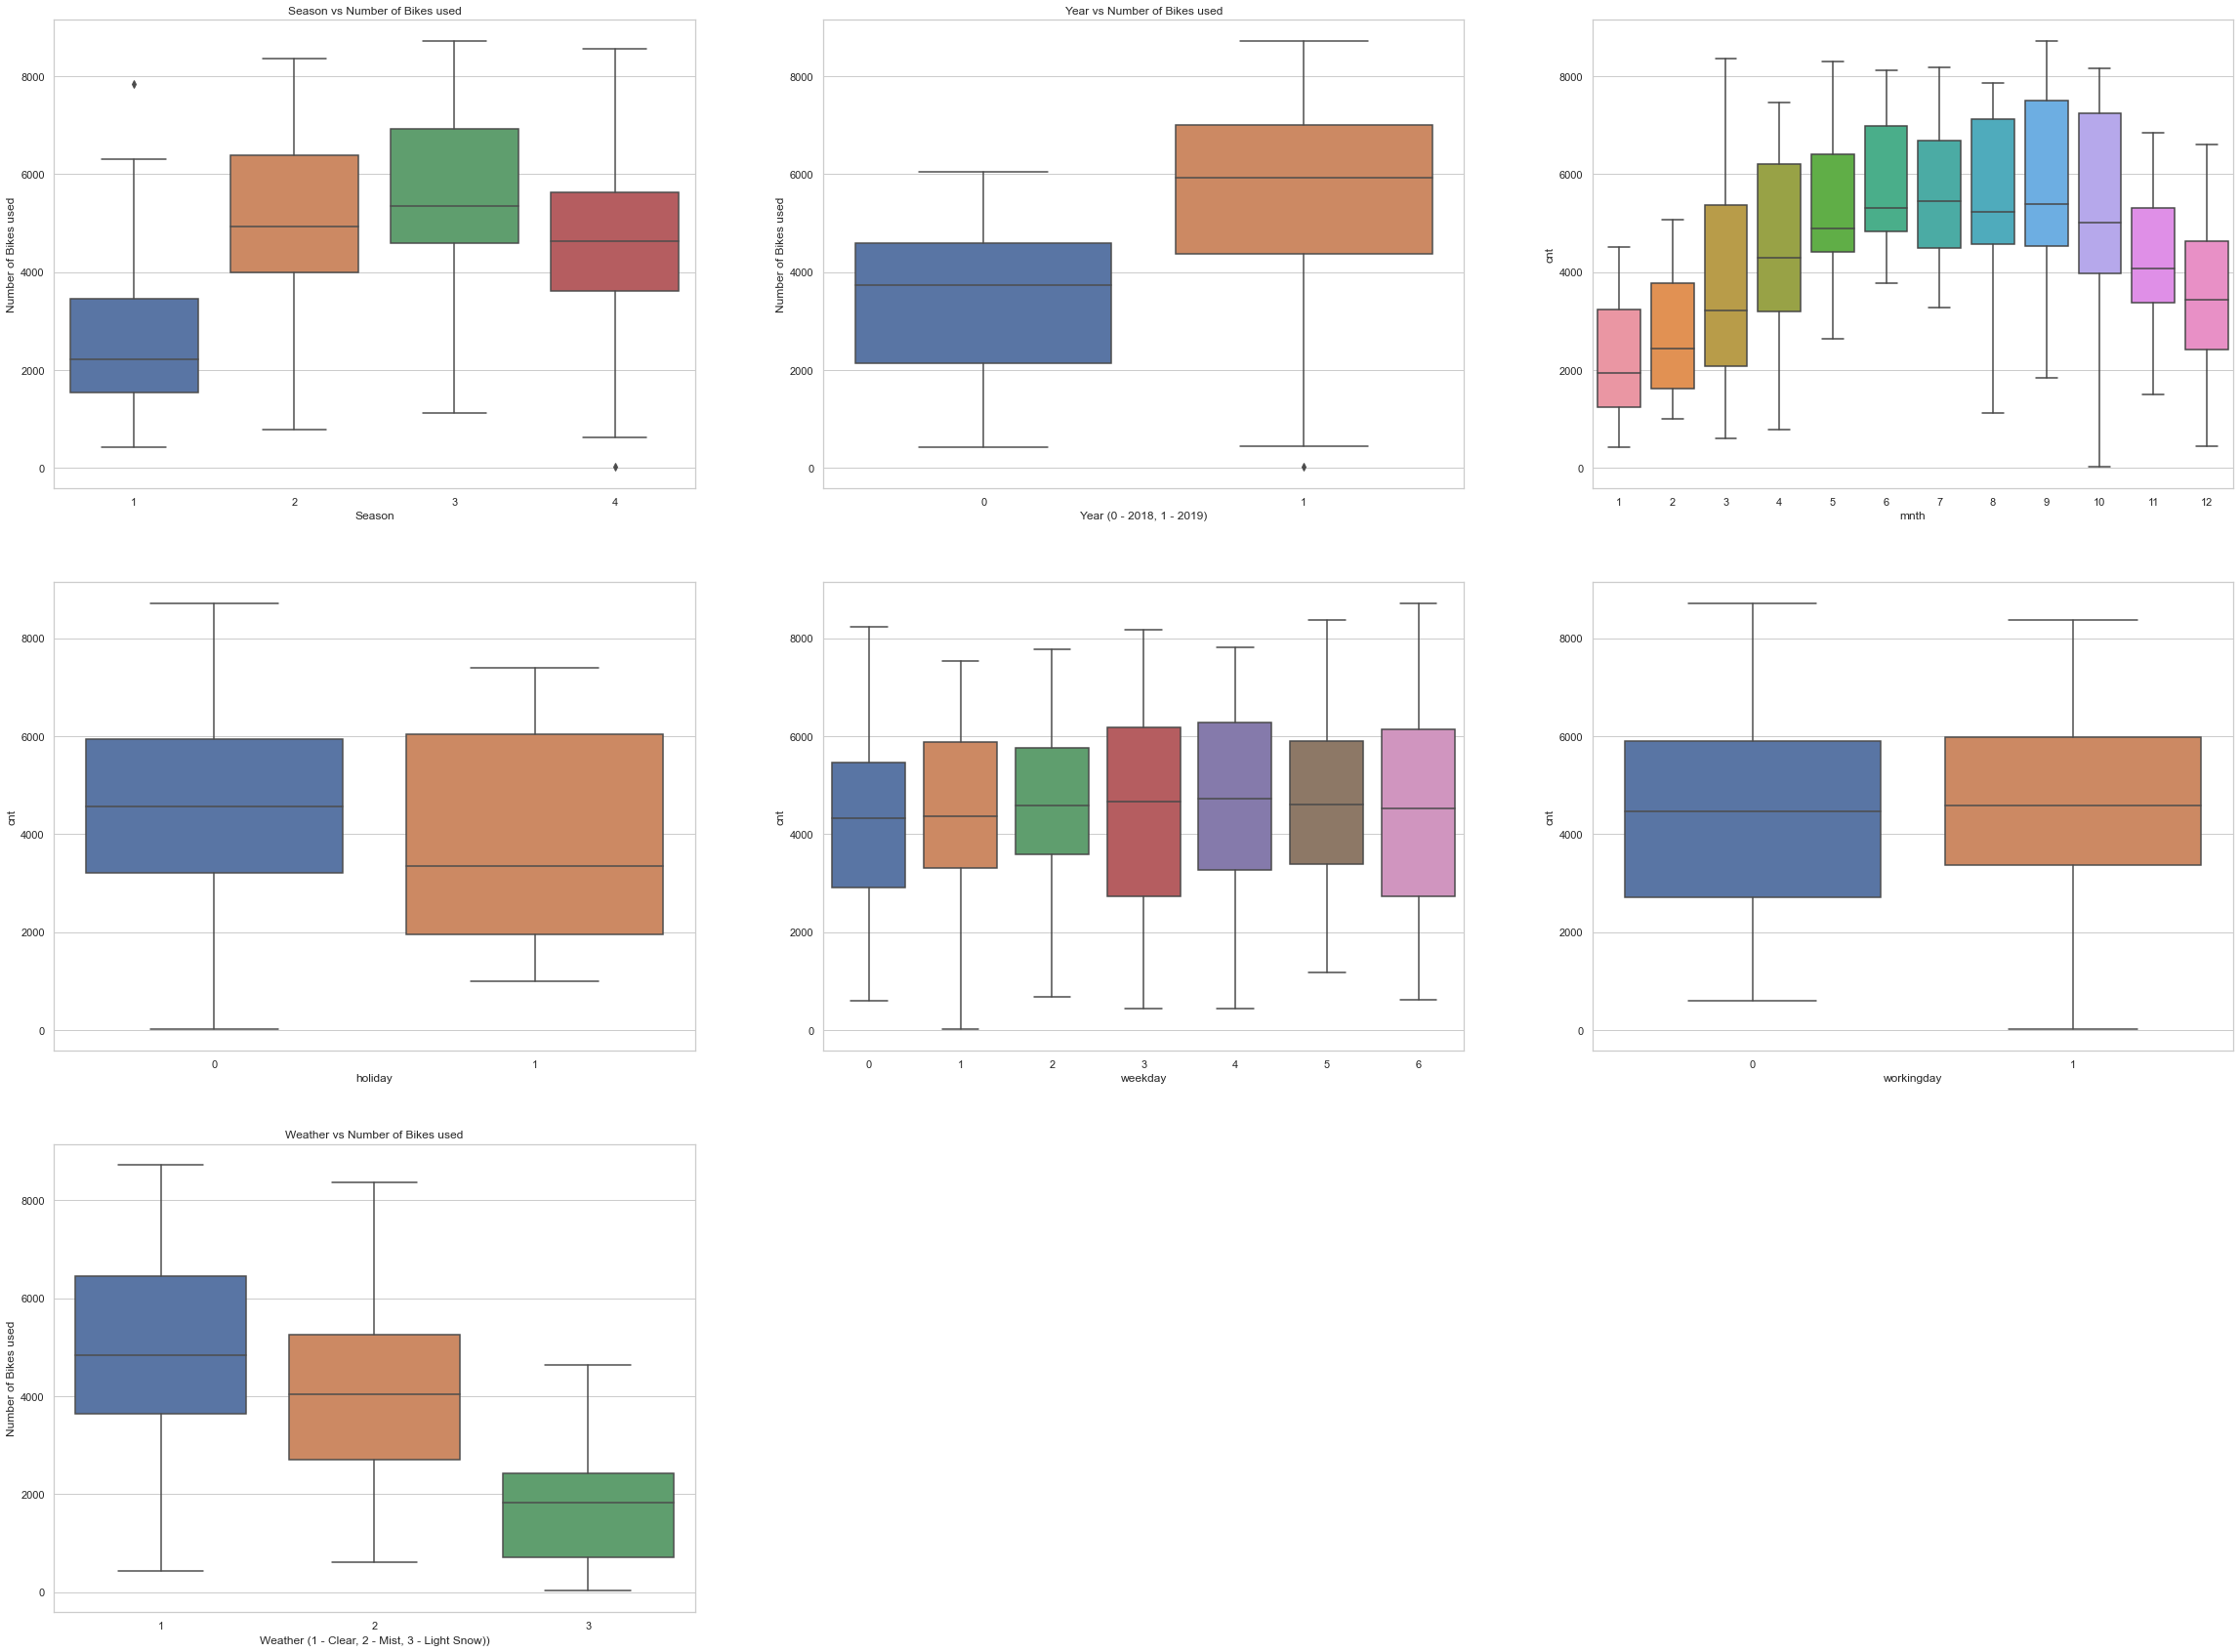

In [51]:
## Lets use subplots to save time.
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
ax1  = sb.boxplot(x='season', y='cnt', data=bikesusage)
ax1.set(xlabel='Season', ylabel='Number of Bikes used',title='Season vs Number of Bikes used')
plt.subplot(3,3,2)
ax2 = sb.boxplot(x='yr', y='cnt', data=bikesusage)
ax2.set(xlabel='Year (0 - 2018, 1 - 2019)', ylabel='Number of Bikes used',title='Year vs Number of Bikes used')
plt.subplot(3,3,3)
sb.boxplot(x='mnth', y='cnt', data=bikesusage)
plt.subplot(3,3,4)
sb.boxplot(x='holiday', y='cnt', data=bikesusage)
plt.subplot(3,3,5)
sb.boxplot(x='weekday', y='cnt', data=bikesusage)
plt.subplot(3,3,6)
sb.boxplot(x='workingday', y='cnt', data=bikesusage)
plt.subplot(3,3,7)
ax3 = sb.boxplot(x='weathersit', y='cnt', data=bikesusage)
ax3.set(xlabel='Weather (1 - Clear, 2 - Mist, 3 - Light Snow))', ylabel='Number of Bikes used',title='Weather vs Number of Bikes used')

### Working Day and Holiday are not having much impact on the bike usage.
### As mentioned above, Year 2019 has more usage, that it is getting more popular.
### Weather has a huge impact on the bikes usage. When it is clear, most usages are there and when it's snowing least usages are there.
### Season has a notable impact as well. Most usages are when it is Falls and Summer.
### If you look at monthly distribution, months 4-10 has most usages. It declines during months 11, 12, 1, 2, 3. Looks like the weather impact and it is mostly snowy and cold.

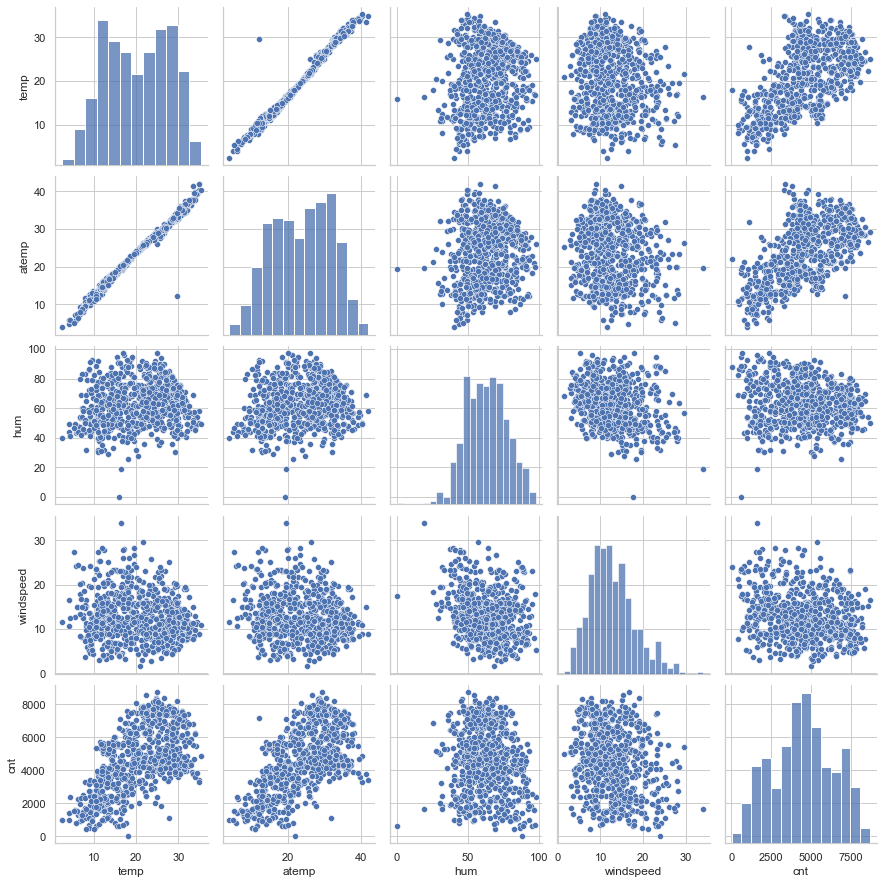

In [52]:
# Lets look at the pair wise distribution for continous variables.
sb.pairplot(bikesusage[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

### temp and atemp has perfect linear relationship
### cnt has lenear relatonship with temp and atemp
### temp and atemp are similar data. Keeping atemp (Feels like) is more meaningful.

In [53]:
del bikesusage['temp']

In [54]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


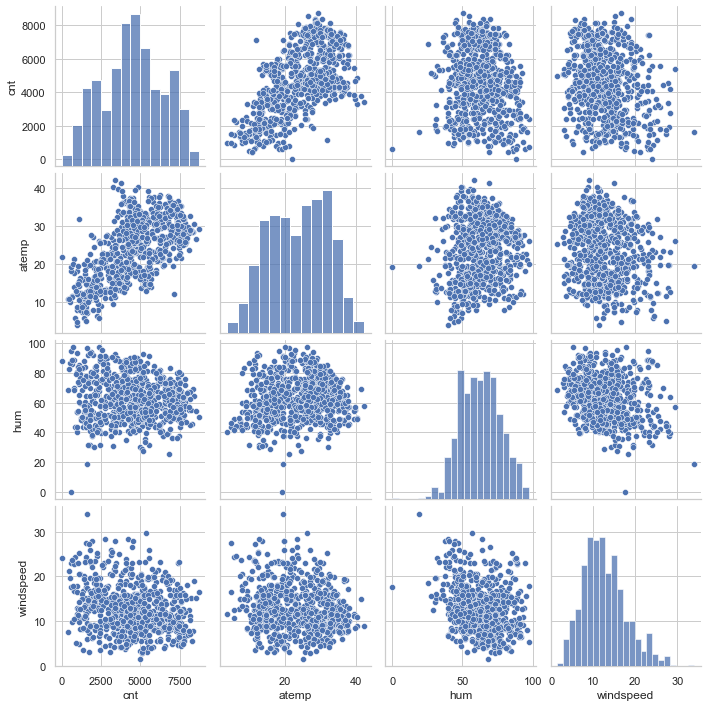

In [55]:
sb.pairplot(bikesusage[['cnt', 'atemp', 'hum', 'windspeed']])

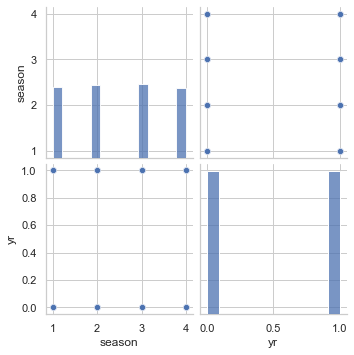

In [56]:
sb.pairplot(bikesusage[['season', 'yr']])

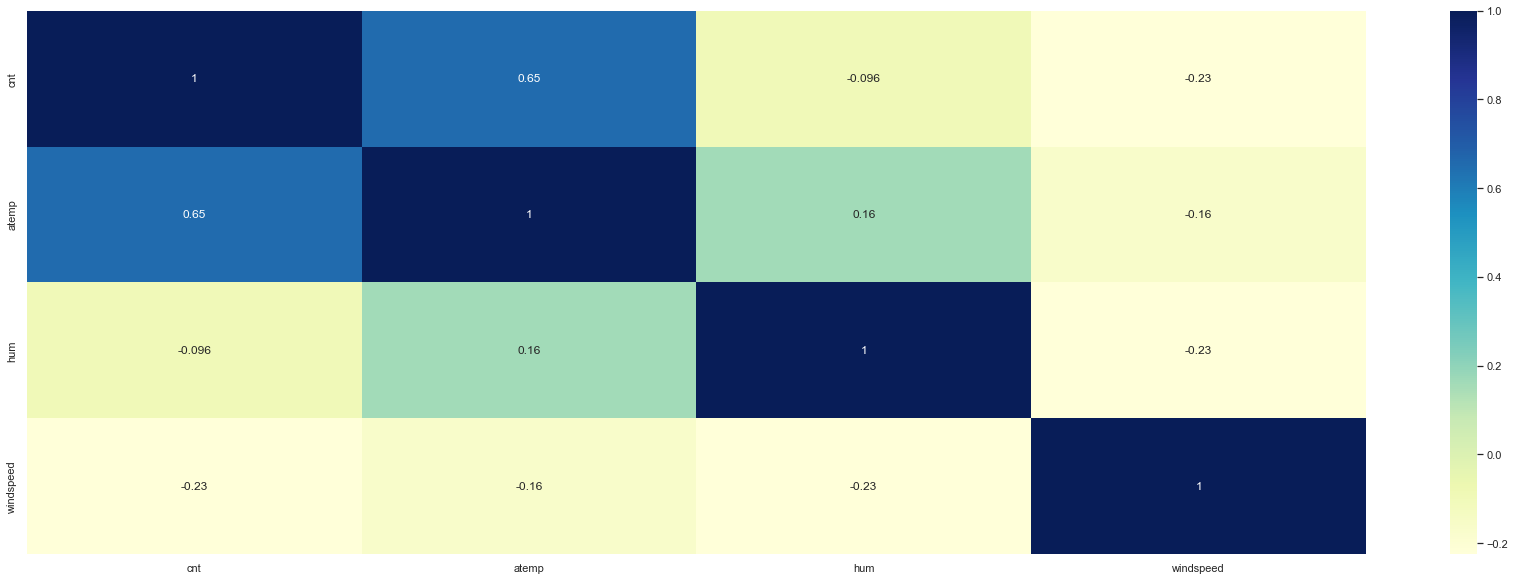

In [139]:
plt.figure(figsize = (30,10))        # Size of the figure
sb.heatmap(bikesusage[['cnt', 'atemp', 'hum', 'windspeed']].corr(),annot = True, cmap="YlGnBu")
plt.show()

#### There are a small number of outliers in the columns 'atemp', 'hum', 'windspeed'

In [57]:
bikesusage[['atemp', 'hum', 'windspeed']].describe(percentiles=(.25,.5,.75,.95,.96,.97,.98,.99))

,atemp,hum,windspeed
count,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620
std,8.150308,14.237589,5.195841
min,3.953480,0.000000,1.500244
25%,16.889713,52.000000,9.041650
50%,24.368225,62.625000,12.125325
75%,30.445775,72.989575,15.625589
95%,35.749975,86.868735,22.999988
96%,36.206218,88.118328,23.302876
97%,36.629070,89.540550,23.999167


In [58]:
## Lets keep up to 99th percentile
bikesusage[bikesusage.atemp > bikesusage.atemp.quantile(.99)][['atemp', 'hum', 'windspeed']]

,atemp,hum,windspeed
201,41.31855,69.1250,14.875407
202,42.04480,58.0417,8.917700
203,40.21435,50.0000,8.791807
204,39.74145,55.0833,11.334457
209,39.29835,54.2500,11.667246
544,39.33065,48.8750,11.082939
552,40.24565,49.2083,10.958118
553,39.51980,57.3750,8.417143


In [59]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [60]:
# Remove data above 99th percentile
bikesusage = bikesusage[bikesusage.atemp < bikesusage.atemp.quantile(.99)]
bikesusage = bikesusage[bikesusage.hum < bikesusage.hum.quantile(.99)]
bikesusage = bikesusage[bikesusage.windspeed < bikesusage.windspeed.quantile(.99)]

In [61]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      706 non-null    int64  
 1   yr          706 non-null    int64  
 2   mnth        706 non-null    int64  
 3   holiday     706 non-null    int64  
 4   weekday     706 non-null    int64  
 5   workingday  706 non-null    int64  
 6   weathersit  706 non-null    int64  
 7   atemp       706 non-null    float64
 8   hum         706 non-null    float64
 9   windspeed   706 non-null    float64
 10  cnt         706 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 66.2 KB


## Build the model

### Data Preparation

### Create dummies for categorical variables

In [62]:
# From the above analysis, we have seen that significant categorical features are season, yr, mnth, weekday, weathersit
# yr is already a dummy feature.
# Lets work on the remaining categorical variables.
season_dummies = pd.get_dummies(bikesusage['season'], prefix='season', drop_first=True)

In [63]:
season_dummies

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [64]:
season_dummies.rename(columns={'season_2': 'summer_season', 
                               'season_3': 'falls_season', 
                               'season_4': 'winter_season' }, inplace=True)

In [65]:
season_dummies

,summer_season,falls_season,winter_season
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [66]:
mnth_dummies = pd.get_dummies(bikesusage['mnth'], prefix='mnth', drop_first=True)

In [67]:
mnth_dummies

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [68]:
mnth_dummies.rename(columns={
        'mnth_2': 'february',
        'mnth_3': 'march',
        'mnth_4': 'april',
        'mnth_5': 'may',
        'mnth_6': 'jun',
        'mnth_7': 'july',
        'mnth_8': 'august',
        'mnth_9': 'september',
        'mnth_10': 'october',
        'mnth_11': 'november',
        'mnth_12': 'december'
    }, inplace=True)

In [69]:
mnth_dummies

,february,march,april,may,jun,july,august,september,october,november,december
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [70]:
weekday_dummies = pd.get_dummies(bikesusage['weekday'], prefix='weekday', drop_first=True)

In [71]:
weekday_dummies

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [72]:
weekday_dummies.rename(columns={
    'weekday_1': 'tuesday',
    'weekday_2': 'wednesday',
    'weekday_3': 'thursday',
    'weekday_4': 'friday',
    'weekday_5': 'saturday',
    'weekday_6': 'sunday'
} , inplace=True)

In [73]:
weekday_dummies

,tuesday,wednesday,thursday,friday,saturday,sunday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [74]:
weathersit_dummies = pd.get_dummies(bikesusage['weathersit'], prefix='weathersit', drop_first=True)

In [75]:
weathersit_dummies

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [76]:
weathersit_dummies.rename(columns={
    'weathersit_2': 'mist_cloudy',
    'weathersit_3': 'light_snow_rain'
}, inplace=True)

In [77]:
weathersit_dummies

,mist_cloudy,light_snow_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [78]:
## Lets now add the dummies to the main dataframe
bikesusage = pd.concat([bikesusage, season_dummies, mnth_dummies, weekday_dummies, weathersit_dummies], axis=1)

In [79]:
bikesusage.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,november,december,tuesday,wednesday,thursday,friday,saturday,sunday,mist_cloudy,light_snow_rain
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


In [80]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           706 non-null    int64  
 1   yr               706 non-null    int64  
 2   mnth             706 non-null    int64  
 3   holiday          706 non-null    int64  
 4   weekday          706 non-null    int64  
 5   workingday       706 non-null    int64  
 6   weathersit       706 non-null    int64  
 7   atemp            706 non-null    float64
 8   hum              706 non-null    float64
 9   windspeed        706 non-null    float64
 10  cnt              706 non-null    int64  
 11  summer_season    706 non-null    uint8  
 12  falls_season     706 non-null    uint8  
 13  winter_season    706 non-null    uint8  
 14  february         706 non-null    uint8  
 15  march            706 non-null    uint8  
 16  april            706 non-null    uint8  
 17  may             

In [81]:
bikesusage.drop(['season', 'mnth', 'weekday', 'weathersit'], inplace=True, axis=1)

In [82]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               706 non-null    int64  
 1   holiday          706 non-null    int64  
 2   workingday       706 non-null    int64  
 3   atemp            706 non-null    float64
 4   hum              706 non-null    float64
 5   windspeed        706 non-null    float64
 6   cnt              706 non-null    int64  
 7   summer_season    706 non-null    uint8  
 8   falls_season     706 non-null    uint8  
 9   winter_season    706 non-null    uint8  
 10  february         706 non-null    uint8  
 11  march            706 non-null    uint8  
 12  april            706 non-null    uint8  
 13  may              706 non-null    uint8  
 14  jun              706 non-null    uint8  
 15  july             706 non-null    uint8  
 16  august           706 non-null    uint8  
 17  september       

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

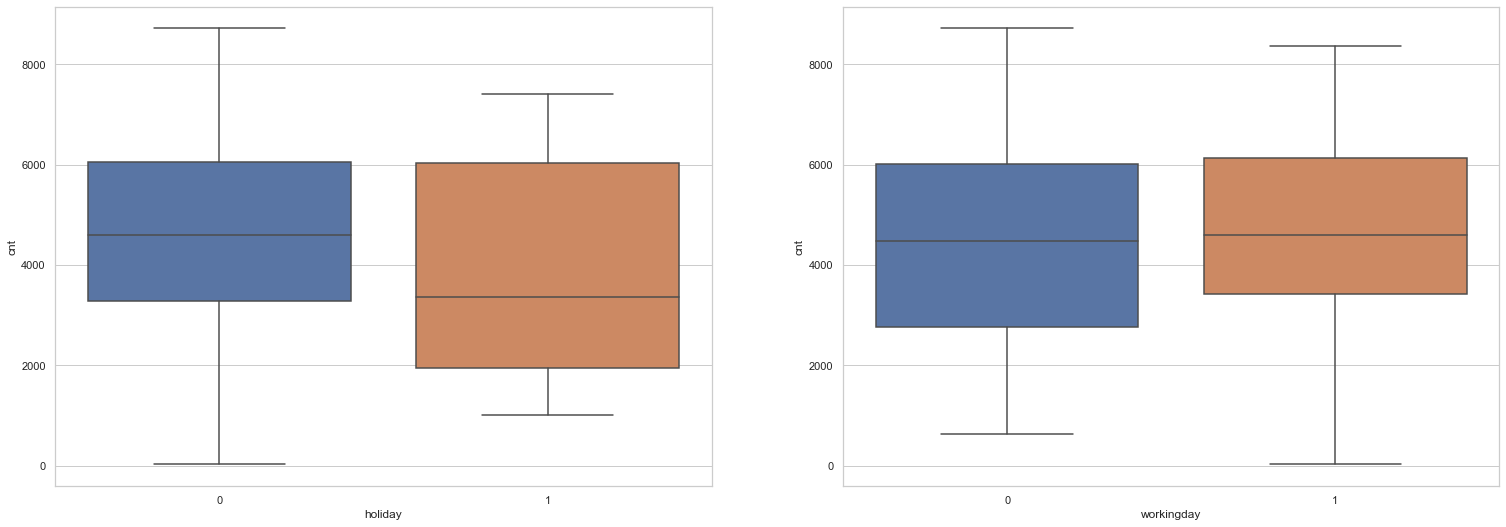

In [83]:
## Lets use subplots to check outliers again
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
sb.boxplot(x='holiday', y='cnt', data=bikesusage)
plt.subplot(3,3,2)
sb.boxplot(x='workingday', y='cnt', data=bikesusage)


<AxesSubplot:xlabel='windspeed'>

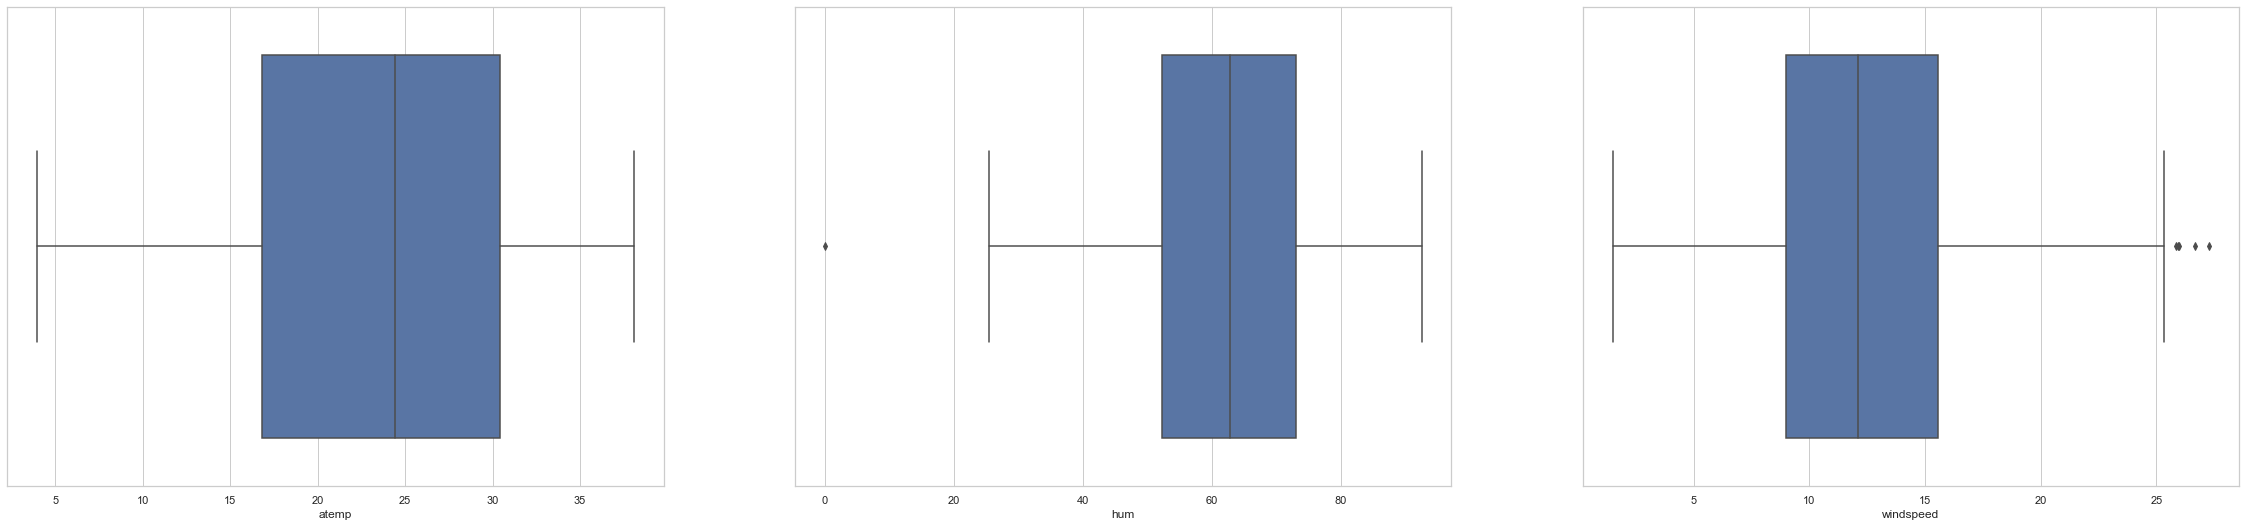

In [84]:
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
sb.boxplot(x='atemp', data=bikesusage)
plt.subplot(3,3,2)
sb.boxplot(x='hum',data=bikesusage)
plt.subplot(3,3,3)
sb.boxplot(x='windspeed',data=bikesusage)

In [85]:
bikesusage[['hum']].describe(percentiles=(.25,.5,.75,.95,.96,.97,.98,.99))

,hum
count,706.000000
mean,62.703381
std,13.808676
min,0.000000
25%,52.270825
50%,62.833350
75%,72.958300
95%,85.812475
96%,86.941660
97%,88.118745


In [86]:
bikesusage[bikesusage['hum'] == 0]

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer_season,falls_season,winter_season,...,november,december,tuesday,wednesday,thursday,friday,saturday,sunday,mist_cloudy,light_snow_rain
68,0,0,1,19.2834,0.0,17.545759,623,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [87]:
bikesusage = bikesusage[bikesusage['hum'] > 0]

In [88]:
bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               705 non-null    int64  
 1   holiday          705 non-null    int64  
 2   workingday       705 non-null    int64  
 3   atemp            705 non-null    float64
 4   hum              705 non-null    float64
 5   windspeed        705 non-null    float64
 6   cnt              705 non-null    int64  
 7   summer_season    705 non-null    uint8  
 8   falls_season     705 non-null    uint8  
 9   winter_season    705 non-null    uint8  
 10  february         705 non-null    uint8  
 11  march            705 non-null    uint8  
 12  april            705 non-null    uint8  
 13  may              705 non-null    uint8  
 14  jun              705 non-null    uint8  
 15  july             705 non-null    uint8  
 16  august           705 non-null    uint8  
 17  september       

<AxesSubplot:xlabel='windspeed'>

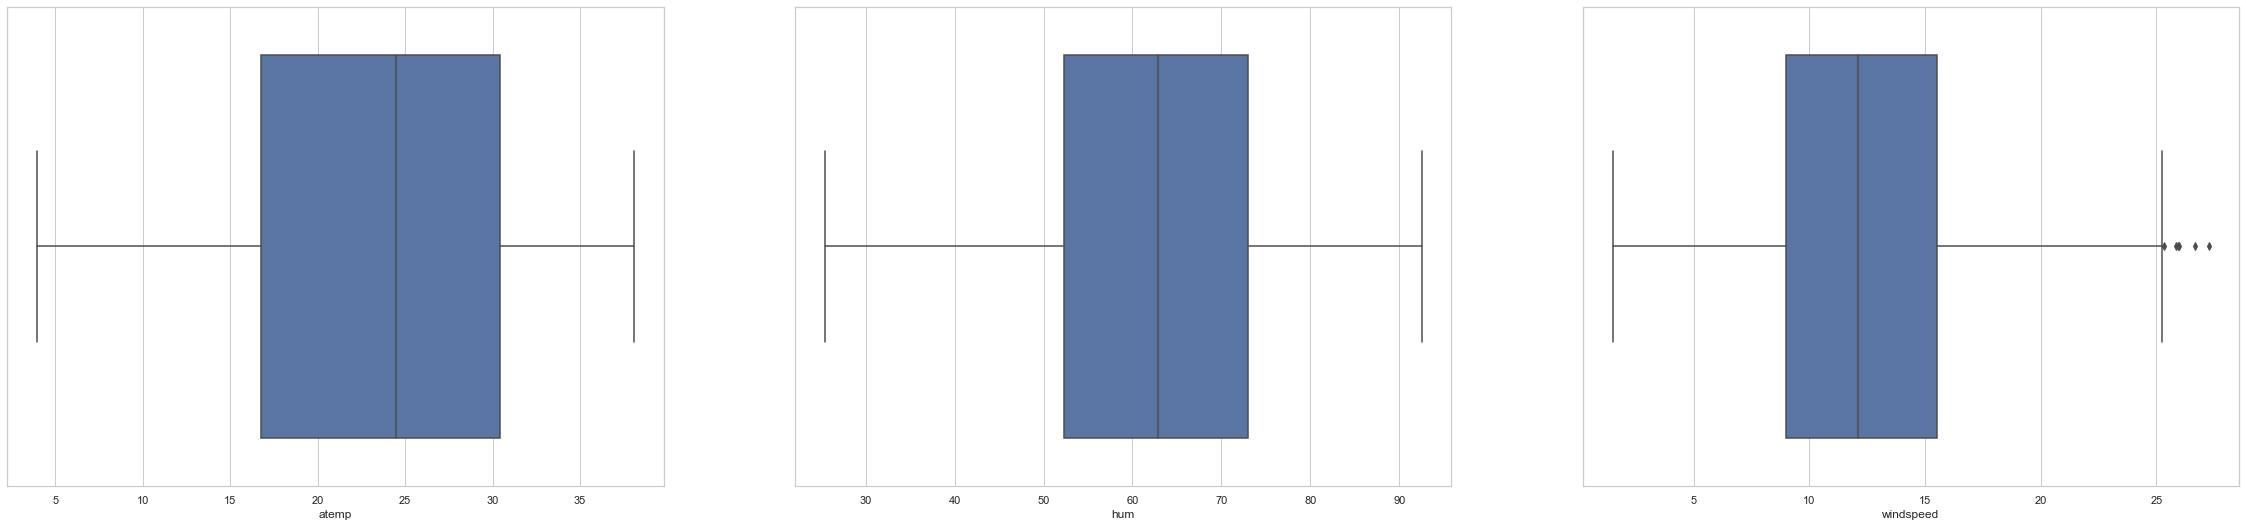

In [89]:
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
sb.boxplot(x='atemp', data=bikesusage)
plt.subplot(3,3,2)
sb.boxplot(x='hum',data=bikesusage)
plt.subplot(3,3,3)
sb.boxplot(x='windspeed',data=bikesusage)

In [90]:
bikesusage[['windspeed']].describe(percentiles=(.25,.5,.75,.95,.96,.97,.98,.99))

,windspeed
count,705.000000
mean,12.596002
std,4.946472
min,1.500244
25%,9.000914
50%,12.124789
75%,15.500986
95%,22.350517
96%,22.993132
97%,23.303393


### Split the data for Train and Test

In [91]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikesusage_train, bikesusage_test = train_test_split(bikesusage, train_size = 0.7, test_size=0.3, random_state=105)

#### Scale the data

In [92]:
continuous_vars = ['atemp', 'hum', 'windspeed']

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bikesusage_train[continuous_vars] = scaler.fit_transform(bikesusage_train[continuous_vars])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [94]:
bikesusage_train

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer_season,falls_season,winter_season,...,november,december,tuesday,wednesday,thursday,friday,saturday,sunday,mist_cloudy,light_snow_rain
585,1,0,1,0.906632,0.530809,0.347336,7286,0,1,0,...,0,0,0,0,0,1,0,0,0,0
167,0,0,1,0.757016,0.708600,0.313381,4844,1,0,0,...,0,0,0,0,0,0,1,0,0,0
165,0,0,1,0.737954,0.301670,0.378020,5180,1,0,0,...,0,0,0,0,1,0,0,0,0,0
173,0,0,1,0.898066,0.658536,0.562177,4790,0,1,0,...,0,0,0,0,0,1,0,0,1,0
254,0,0,1,0.759652,0.641347,0.172803,4713,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,0,0,0.903758,0.519897,0.350583,6685,0,1,0,...,0,0,0,0,0,0,0,1,0,0
238,0,0,0,0.810105,0.884467,0.917577,1115,0,1,0,...,0,0,0,0,0,0,0,1,1,0
78,0,0,0,0.342493,0.304878,0.481432,2471,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,1,0,1,0.530195,0.642491,0.205165,7461,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Lets look at the correlation matrix

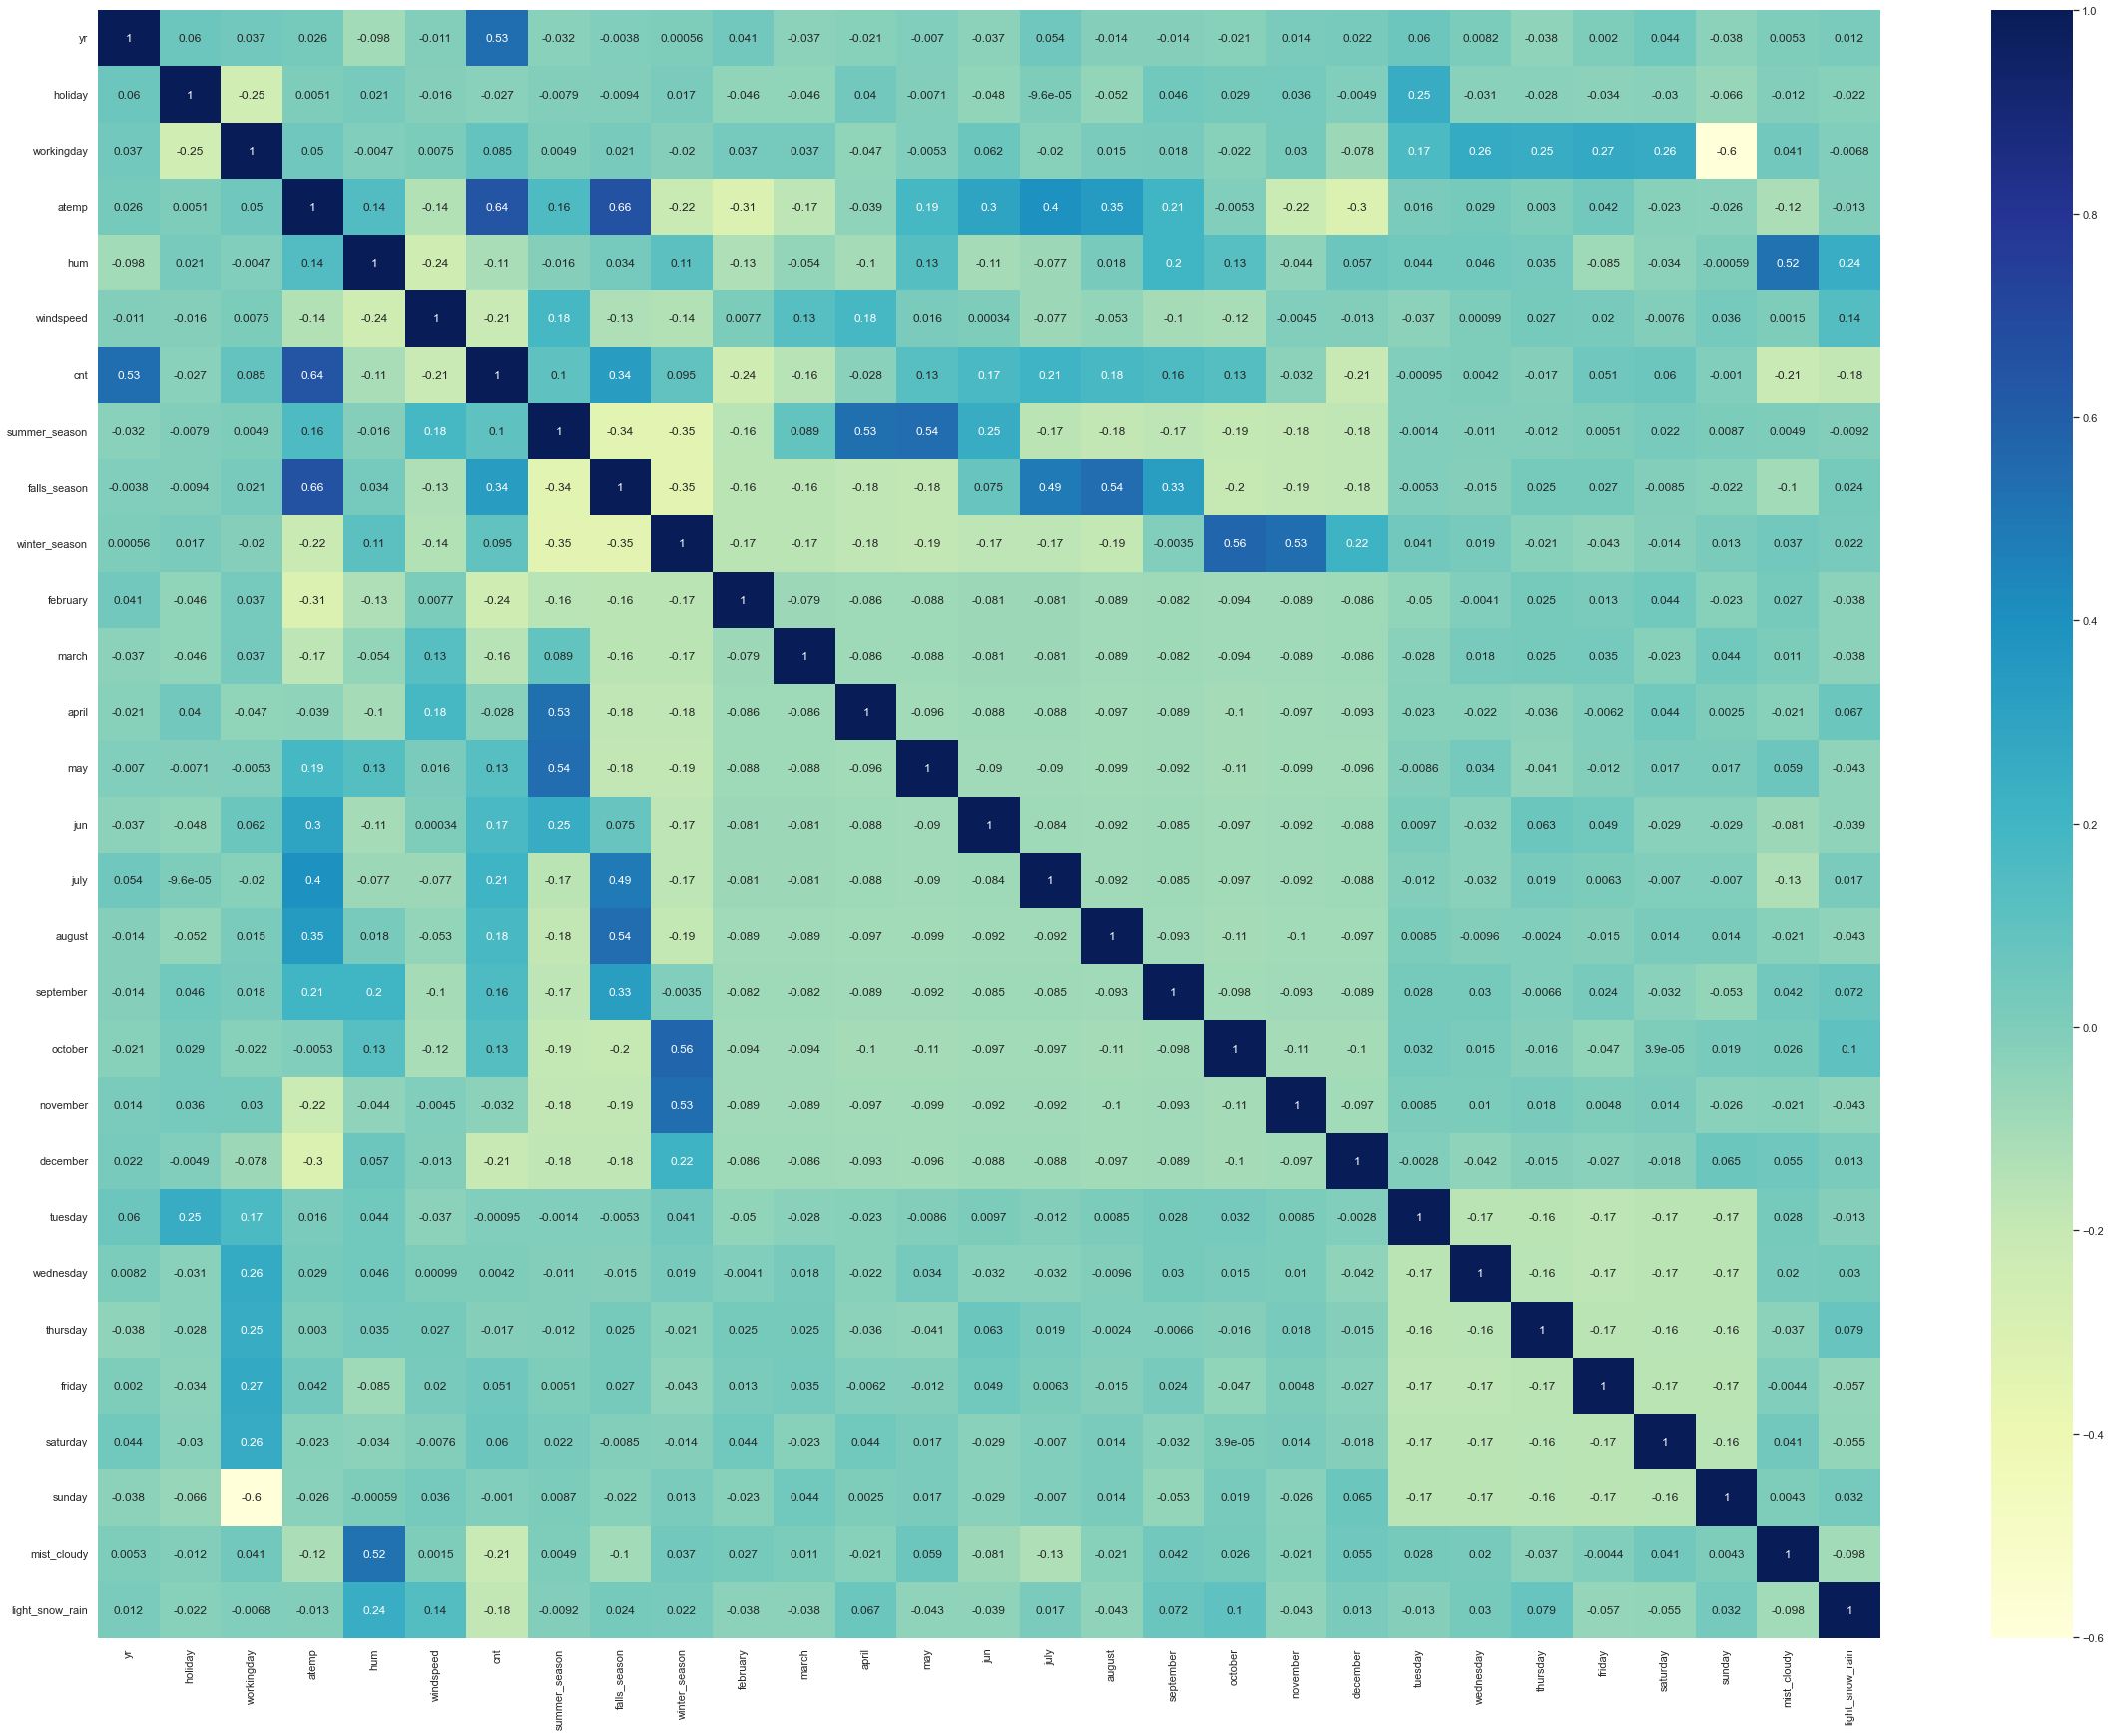

In [95]:
plt.figure(figsize = (40,30))        # Size of the figure
sb.heatmap(bikesusage_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### cnt has high correlation with falls_season, atemp and yr
#### cnt has -ve correlation with light_snow_rain, mist_cloudy, sunday, thursday, wednesday, tuesday, december, november, april, march, february, windspeed, humidity, holiday

In [96]:
### Create X and y sets
y_train = bikesusage_train.pop('cnt')
X_train = bikesusage_train


### Recursive Feature Elimination (RFE)

In [97]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [98]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)             # running RFE
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer_season', True, 1),
 ('falls_season', True, 1),
 ('winter_season', True, 1),
 ('february', False, 11),
 ('march', False, 3),
 ('april', False, 2),
 ('may', True, 1),
 ('jun', True, 1),
 ('july', False, 7),
 ('august', False, 5),
 ('september', True, 1),
 ('october', False, 4),
 ('november', True, 1),
 ('december', True, 1),
 ('tuesday', True, 1),
 ('wednesday', False, 6),
 ('thursday', False, 9),
 ('friday', False, 10),
 ('saturday', False, 8),
 ('sunday', True, 1),
 ('mist_cloudy', True, 1),
 ('light_snow_rain', True, 1)]

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'summer_season', 'falls_season', 'winter_season', 'may', 'jun',
       'september', 'november', 'december', 'tuesday', 'sunday', 'mist_cloudy',
       'light_snow_rain'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['february', 'march', 'april', 'july', 'august', 'october', 'wednesday',
       'thursday', 'friday', 'saturday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [107]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_orig = X_train[col]

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe_orig)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [109]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [110]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     156.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.69e-186
Time:                        16:58:34   Log-Likelihood:                -3937.9
No. Observations:                 493   AIC:                             7914.
Df Residuals:                     474   BIC:                             7994.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1396.4863    195.218     

In [111]:
# jun seems to be insignificant in presence of other variables; can be dropped
X_train_rfe_orig.drop(["jun"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.95e-187
Time:                        16:59:22   Log-Likelihood:                -3938.2
No. Observations:                 493   AIC:                             7912.
Df Residuals:                     475   BIC:                             7988.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1387.3194    194.833     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
# april seems to be insignificant in presence of other variables; can be dropped
X_train_rfe_orig.drop(["holiday"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.23e-188
Time:                        17:00:01   Log-Likelihood:                -3939.0
No. Observations:                 493   AIC:                             7912.
Df Residuals:                     476   BIC:                             7983.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1357.5304    193.432     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
# may seems to be insignificant in presence of other variables; can be dropped
X_train_rfe_orig.drop(["may"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.27e-188
Time:                        17:00:38   Log-Likelihood:                -3940.7
No. Observations:                 493   AIC:                             7913.
Df Residuals:                     477   BIC:                             7981.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1311.4754    192.205     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
X_train_rfe_orig.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer_season',
       'falls_season', 'winter_season', 'september', 'november', 'december',
       'tuesday', 'sunday', 'mist_cloudy', 'light_snow_rain'],
      dtype='object')

In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_orig
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.19
3,hum,11.77
6,falls_season,6.72
4,windspeed,4.66
1,workingday,4.55
7,winter_season,3.83
5,summer_season,3.76
13,mist_cloudy,2.50
0,yr,2.03
9,november,1.84


In [116]:
# atemp is having high VIF. Lets drop that.
X_train_rfe_orig.drop(["atemp"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     132.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.54e-154
Time:                        17:01:22   Log-Likelihood:                -4024.8
No. Observations:                 493   AIC:                             8080.
Df Residuals:                     478   BIC:                             8143.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2129.1406    216.806     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [117]:
# hum seems to be insignificant in presence of other variables; can be dropped
X_train_rfe_orig.drop(["hum"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     142.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.48e-155
Time:                        17:01:34   Log-Likelihood:                -4025.0
No. Observations:                 493   AIC:                             8078.
Df Residuals:                     479   BIC:                             8137.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2042.8807    160.451     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [118]:
# september seems to be insignificant in presence of other variables; can be dropped
X_train_rfe_orig.drop(["september"], axis = 1, inplace=True)
X_train_lm = sm.add_constant(X_train_rfe_orig)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.12e-156
Time:                        17:02:04   Log-Likelihood:                -4026.6
No. Observations:                 493   AIC:                             8079.
Df Residuals:                     480   BIC:                             8134.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2053.6289    160.686     

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [119]:
# Lets check the VIFs again

vif = pd.DataFrame()
X = X_train_rfe_orig
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.34
1,workingday,3.91
5,winter_season,2.38
0,yr,1.92
3,summer_season,1.91
4,falls_season,1.75
6,november,1.68
9,sunday,1.60
10,mist_cloudy,1.52
7,december,1.28


In [120]:
model_columns = vif.Features.unique()

In [121]:
model_columns

array(['windspeed', 'workingday', 'winter_season', 'yr', 'summer_season',
       'falls_season', 'november', 'sunday', 'mist_cloudy', 'december',
       'tuesday', 'light_snow_rain'], dtype=object)

In [122]:
model_columns = X_train_lm.columns

In [123]:
model_columns

Index(['const', 'yr', 'workingday', 'windspeed', 'summer_season',
       'falls_season', 'winter_season', 'november', 'december', 'tuesday',
       'sunday', 'mist_cloudy', 'light_snow_rain'],
      dtype='object')

In [124]:
model_columns = model_columns.drop('const')

In [125]:
model_columns

Index(['yr', 'workingday', 'windspeed', 'summer_season', 'falls_season',
       'winter_season', 'november', 'december', 'tuesday', 'sunday',
       'mist_cloudy', 'light_snow_rain'],
      dtype='object')

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [126]:
y_train_price = lm.predict(X_train_lm)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

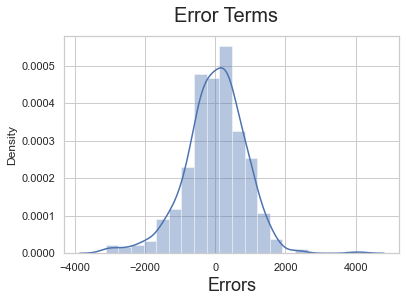

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

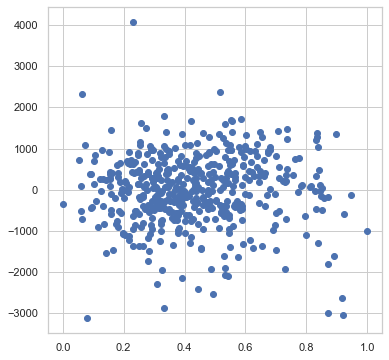

In [128]:
plt.figure(figsize=[6,6])
plt.scatter(X_train['windspeed'], (y_train - y_train_price))
plt.show()

In [129]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

0.7934395696668995

### Error terms follows a normal distribution with mean 0
### this is as per the assumptions. so the model is good.

### Error terms do not follow any pattern

## Making Predictions


#### Applying the scaling on the test sets


In [130]:
bikesusage_test[continuous_vars] = scaler.transform(bikesusage_test[continuous_vars])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [131]:
y_test = bikesusage_test.pop('cnt')
X_test = bikesusage_test

In [132]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[model_columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

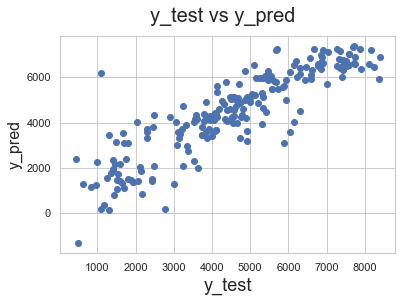

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## It is a linear model

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

920765.0908198317

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7758333938232449

## The r2-score for text data is 0.78 
## The r2-score for train data is 0.79